Descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos de EEUU(2008-2019)

In [1]:
import pandas as pd
data=pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=733&path=demographic_health_data.csv")
data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [24]:
data.shape
data.select_dtypes(include='object')

,COUNTY_NAME,STATE_NAME
0,Autauga,Alabama
1,Baldwin,Alabama
2,Barbour,Alabama
3,Bibb,Alabama
4,Blount,Alabama
...,...,...
3135,Sweetwater,Wyoming
3136,Teton,Wyoming
3137,Uinta,Wyoming
3138,Washakie,Wyoming


In [25]:
data['Total Hospitals (2019)']

0       1.148905
1       4.505074
2       0.514126
3       0.462860
4       1.195171
          ...   
3135    2.160982
3136    1.158570
3137    1.018926
3138    0.395794
3139    0.349714
Name: Total Hospitals (2019), Length: 3140, dtype: float64

### Exploración y limpieza de datos

In [26]:
data.drop("fips", axis = 1).duplicated().sum()

np.int64(0)

In [27]:
data_obj ='Total Hospitals (2019)'
data_numerico = data.select_dtypes(include=['int64', 'float64']).drop(columns=[data_obj]) 
data_texto = data.select_dtypes(include=['object'])


In [28]:
data_numerico=data_numerico.columns.tolist()

In [81]:
data_texto

['COUNTY_NAME', 'STATE_NAME']

In [ ]:
data_texto=data_texto.columns.tolist()

AttributeError: 'list' object has no attribute 'columns'

In [30]:
data_obj

'Total Hospitals (2019)'

In [31]:
df=data[data_numerico + data_texto+ [data_obj]]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
df.isnull().sum().sort_values(ascending=False)

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_number                0
Urban_rural_code          0
COUNTY_NAME               0
STATE_NAME                0
Total Hospitals (2019)    0
Length: 108, dtype: int64

In [34]:
x, y =df.drop(columns='Total Hospitals (2019)'), df[data_obj]


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [36]:
df['STATE_NAME'].value_counts()

STATE_NAME
Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Alabama                  67
Florida                  67
South Dakota             66
Louisiana                64
Colorado                 64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico               33
Utah     

In [37]:
df['Total Hospitals (2019)'].value_counts()

Total Hospitals (2019)
0.097644    2
0.163684    2
0.121811    2
0.119736    2
1.300614    2
           ..
0.336191    1
1.425620    1
0.365893    1
0.165264    1
0.103886    1
Name: count, Length: 3135, dtype: int64

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report

In [39]:
def scaler(X_train_, X_test_, nums):
  X_train = X_train_.copy()
  X_test = X_test_.copy()
  scaler = StandardScaler()
  # Train
  X_train_scaled = pd.DataFrame(
             scaler.fit_transform(X_train[nums]),
             columns=scaler.get_feature_names_out(),
             index = X_train.index)
  X_train_scaled = X_train_scaled.join(X_train[list(set(X_train.columns)  - set(nums))])
  # Test
  X_test_scaled = pd.DataFrame(
      scaler.transform(X_test[nums]),
      columns = scaler.get_feature_names_out(),
      index = X_test.index)
  X_test_scaled = X_test_scaled.join(X_test[list(set(X_test.columns)  - set(nums))])
  X_test_scaled = X_test_scaled[X_train_scaled.columns]
  return X_train_scaled, X_test_scaled


def to_binary(X_train_, X_test_, cats):
  X_train =  X_train_.copy()
  X_test = X_test_.copy()
  ohe = OneHotEncoder(handle_unknown='ignore', drop='first')
  # train
  X_train_bin = pd.DataFrame(ohe.fit_transform(
      X_train[cats]).toarray(),
      columns = ohe.get_feature_names_out(),
      index = X_train.index)
  X_train_bin = X_train_bin.join(X_train[list(set(X_train.columns)  - set(cats))])
  # test
  X_test_bin = pd.DataFrame(ohe.transform(X_test[cats]).toarray(),
      columns = ohe.get_feature_names_out(),
      index = X_test.index)
  X_test_bin = X_test_bin.join(X_test[list(set(X_test.columns)  - set(cats))])
  X_test_bin = X_test_bin[X_train_bin.columns]
  return X_train_bin, X_test_bin

In [83]:
x_train_ml , x_test_ml = scaler(x_train, x_test, data_numerico)

In [121]:
x_train_ml, x_test_ml = to_binary(x_train_ml, x_test_ml, data_texto)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


In [42]:
x_data=pd.concat([x_train_ml,x_test_ml])

In [43]:
y_data=pd.concat([y_train,y_test])
y_data

3046     0.356889
1075     0.235688
1304     0.593263
2271     0.567241
2290     1.415275
          ...    
2792    19.690008
440      1.563914
2450     0.309446
1665     0.407138
1020     2.375776
Name: Total Hospitals (2019), Length: 3140, dtype: float64

In [44]:
total_data=pd.concat([x_data,y_data], axis=1)
total_data

,COUNTY_NAME_Acadia,COUNTY_NAME_Accomack,COUNTY_NAME_Ada,COUNTY_NAME_Adair,COUNTY_NAME_Adams,COUNTY_NAME_Addison,COUNTY_NAME_Alachua,COUNTY_NAME_Alamance,COUNTY_NAME_Alameda,COUNTY_NAME_Alamosa,...,60-69,White-alone pop,anycondition_number,Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),N_POP_CHG_2018,CKD_Upper 95% CI,Civilian_labor_force_2018,Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Native American/American Indian-alone pop,Total Hospitals (2019)
3046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.269832,-0.271167,-0.272960,0.592532,-0.169769,-0.024833,-0.249755,0.267953,0.073712,0.356889
1075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.297350,-0.284711,-0.283757,-0.695756,-0.211332,1.274742,-0.270526,0.705087,-0.236301,0.235688
1304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.160556,-0.163681,-0.176990,0.707046,-0.207664,0.462508,-0.184408,-0.081754,-0.198592,0.593263
2271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.192990,-0.185554,-0.193658,0.764304,-0.301180,-0.512173,-0.201129,0.355380,-0.225353,0.567241
2290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017900,0.022228,0.005497,0.764304,-0.405393,0.137614,-0.052929,0.355380,-0.198071,1.415275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.412439,3.684983,2.448241,-1.716844,4.330618,-1.811748,3.183095,-1.218301,2.498039,19.690008
440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.082026,-0.018088,-0.024851,-0.791185,0.057298,-0.999513,0.029454,-0.606314,-0.152368,1.563914
2450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.258654,-0.252344,-0.251318,-0.228155,-0.166713,1.437189,-0.253944,0.530233,-0.229177,0.309446
1665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.300590,-0.290360,-0.300129,0.010417,-0.217444,-0.349726,-0.269081,-0.518887,-0.231957,0.407138


In [99]:
total_data['Quartile_Group'] = pd.qcut(df['Total Hospitals (2019)'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [100]:
total_data['Rank'] = (total_data.groupby('Quartile_Group')['Total Hospitals (2019)'].transform(lambda x: x.rank(ascending=False, method='dense')))

/tmp/ipykernel_690/1710884368.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_data['Rank'] = (total_data.groupby('Quartile_Group')['Total Hospitals (2019)'].transform(lambda x: x.rank(ascending=False, method='dense')))


In [102]:
total_data

,COUNTY_NAME_Acadia,COUNTY_NAME_Accomack,COUNTY_NAME_Ada,COUNTY_NAME_Adair,COUNTY_NAME_Adams,COUNTY_NAME_Addison,COUNTY_NAME_Alachua,COUNTY_NAME_Alamance,COUNTY_NAME_Alameda,COUNTY_NAME_Alamosa,...,anycondition_number,Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),N_POP_CHG_2018,CKD_Upper 95% CI,Civilian_labor_force_2018,Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Native American/American Indian-alone pop,Total Hospitals (2019),Quartile_Group,Rank
3046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.272960,0.592532,-0.169769,-0.024833,-0.249755,0.267953,0.073712,0.356889,Q2,429.0
1075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.283757,-0.695756,-0.211332,1.274742,-0.270526,0.705087,-0.236301,0.235688,Q1,48.0
1304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.176990,0.707046,-0.207664,0.462508,-0.184408,-0.081754,-0.198592,0.593263,Q3,679.0
2271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.193658,0.764304,-0.301180,-0.512173,-0.201129,0.355380,-0.225353,0.567241,Q3,718.0
2290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005497,0.764304,-0.405393,0.137614,-0.052929,0.355380,-0.198071,1.415275,Q4,739.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.448241,-1.716844,4.330618,-1.811748,3.183095,-1.218301,2.498039,19.690008,Q4,30.0
440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.024851,-0.791185,0.057298,-0.999513,0.029454,-0.606314,-0.152368,1.563914,Q4,680.0
2450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.251318,-0.228155,-0.166713,1.437189,-0.253944,0.530233,-0.229177,0.309446,Q2,580.0
1665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.300129,0.010417,-0.217444,-0.349726,-0.269081,-0.518887,-0.231957,0.407138,Q2,280.0


In [109]:
total_data['Rank'].describe()

count    3140.000000
mean      392.330573
std       226.244301
min         1.000000
25%       196.750000
50%       392.500000
75%       588.000000
max       785.000000
Name: Rank, dtype: float64

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

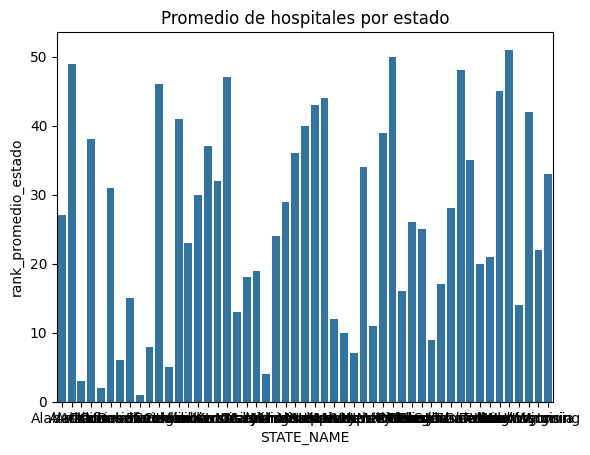

In [ ]:
sns.barplot(y='rank_promedio_estado', x='STATE_NAME', data=df)
plt.title('Promedio de hospitales por estado')
plt.show()

In [111]:
df[['rank_promedio_estado','STATE_NAME']].apply(lambda x: x.unique())


,rank_promedio_estado,STATE_NAME
0,27.0,Alabama
1,49.0,Alaska
2,3.0,Arizona
3,38.0,Arkansas
4,2.0,California
5,31.0,Colorado
6,6.0,Connecticut
7,15.0,Delaware
8,1.0,District of Columbia
9,8.0,Florida
